#### Scaled Dot-Product Attention


Attention Weights:

[[9.23888035e-01 4.46673911e-02 8.38391815e-03 2.23387308e-02
  7.21925362e-04]
 [2.52032763e-01 7.46089811e-01 9.25946359e-04 8.36753521e-04
  1.14725709e-04]
 [4.26269867e-02 2.32399878e-01 1.77266329e-01 1.15304830e-01
  4.32401977e-01]
 [5.72367406e-05 2.71255794e-06 6.90378543e-02 1.12349151e-01
  8.18553046e-01]
 [7.49034001e-04 3.64525234e-02 6.70186424e-02 2.20397128e-02
  8.73740087e-01]]

Attention Output:

[[ 0.70083828  2.14418773 -0.3901886   0.92674217]
 [ 0.34489398  1.0816357  -1.67189632 -0.89545477]
 [ 0.11283931 -0.95333582 -0.21322617 -0.72081349]
 [-0.05455133 -2.05207792  0.32844743 -0.79571886]
 [-0.22501567 -2.18660348  0.11826724 -0.89296879]]


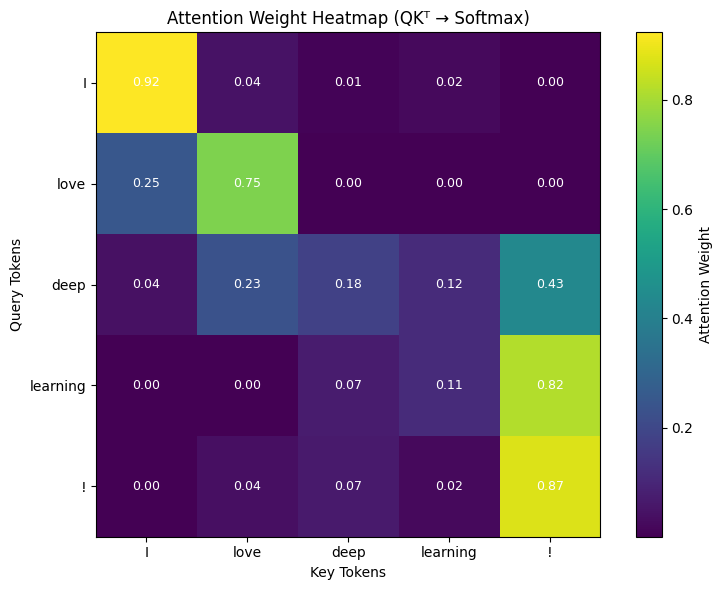

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 1. Input sequence (tokens as vectors)
# 5 tokens, each with embedding size 4
X = np.random.randn(5, 4)

tokens = ["I", "love", "deep", "learning", "!"]

# 2. Initialize Q, K, V matrices
d_model = X.shape[1]
d_k = d_model

W_Q = np.random.randn(d_model, d_model)
W_K = np.random.randn(d_model, d_model)
W_V = np.random.randn(d_model, d_model)

# 3. Compute Q, K, V
Q = X @ W_Q
K = X @ W_K
V = X @ W_V

# 4. Scaled Dot-Product Attention
scores = Q @ K.T / np.sqrt(d_k)

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

attention_weights = softmax(scores)

output = attention_weights @ V

# 5. Print Values (for understanding)
print("\nAttention Weights:\n")
print(attention_weights)

print("\nAttention Output:\n")
print(output)

# 6. Visualization: Attendtion Headmap
plt.figure(figsize=(8,6))
plt.imshow(attention_weights, cmap="viridis")
plt.colorbar(label="Attention Weight")

plt.xticks(range(len(tokens)), tokens)
plt.yticks(range(len(tokens)), tokens)

plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.title("Attention Weight Heatmap (QKᵀ → Softmax)")

for i in range(len(tokens)):
    for j in range(len(tokens)):
        plt.text(j, i, f"{attention_weights[i,j]:.2f}",
        ha="center", va="center", color="white", fontsize=9)

plt.tight_layout()
plt.show()